Датасет скачан из Kaggle, сохранен в Google Disk и загружен в Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Импортируем библиотеку Pandas и знакомимся с датасетом

In [4]:
import pandas as pd
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Обобщенно смотрим на данные

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ищем пропущенные значения и считаем их количество

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Удаляем значения из столбца Cabin, заменяем пустые значения в столбце Age средним арифметическим значением возраста, оставшиеся пустые значения в столбце Embarked также удаляем и проверяем наличие пустых ячеек.

In [7]:
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic.dropna(inplace = True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Выполняем аналитику по каждому столбцу. Выводим в табличной форме количество уникальных значений, минимальное и максимальное значение по каждому столбцу.

In [8]:
titanic.agg({'PassengerId': ['nunique', 'min', 'max'],
             'Survived': ['nunique', 'min', 'max'],
             'Pclass': ['nunique', 'min', 'max'],
             'Name': ['nunique', 'min', 'max'],
             'Sex': ['nunique', 'min', 'max'],
             'Age': ['nunique', 'min', 'max'],
             'SibSp': ['nunique', 'min', 'max'],
             'Parch': ['nunique', 'min', 'max'],
             'Ticket': ['nunique', 'min', 'max'],
             'Fare': ['nunique', 'min', 'max']})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
nunique,889,2,3,889,2,89.00,7,7,680,247.0000
min,1,0,1,"Abbing, Mr. Anthony",female,0.42,0,0,110152,0.0000
max,891,1,3,"van Melkebeke, Mr. Philemon",male,80.00,8,6,WE/P 5735,512.3292


Определяем влияние всех признаков на признак Survived в графическом виде

<Axes: xlabel='Pclass', ylabel='count'>

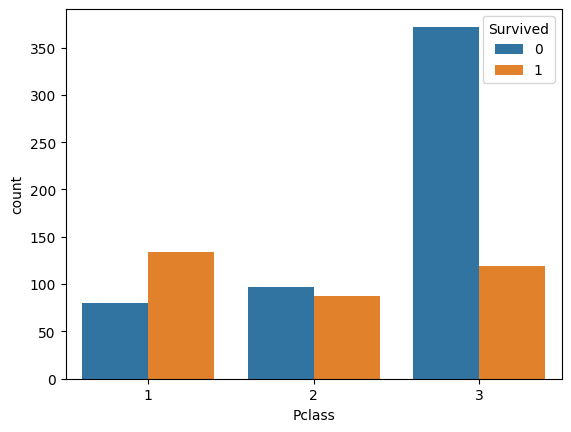

In [13]:
import seaborn as sns
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic)


<Axes: xlabel='Sex', ylabel='count'>

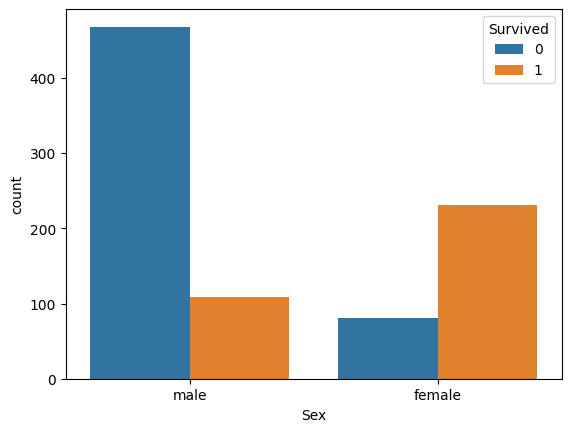

In [14]:
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic)

<Axes: xlabel='SibSp', ylabel='count'>

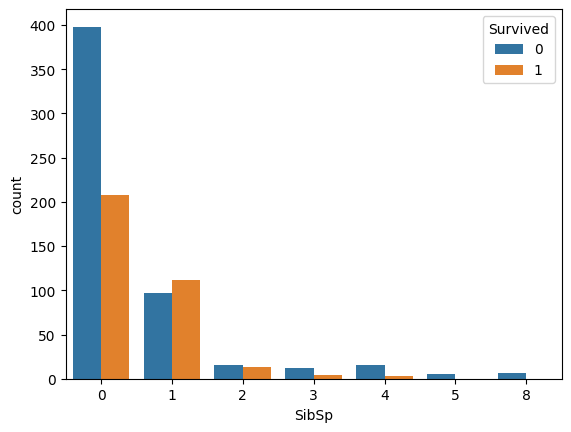

In [15]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic)

<Axes: xlabel='Parch', ylabel='count'>

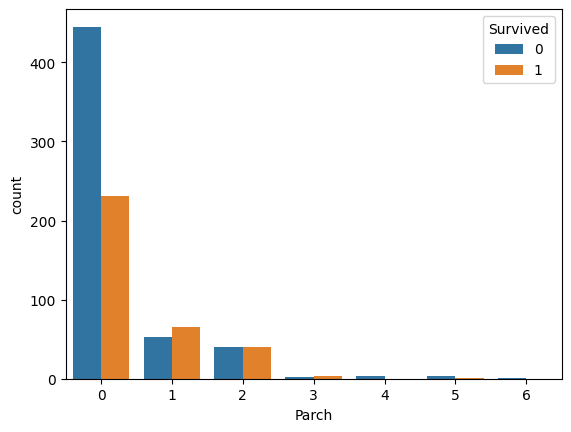

In [16]:
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic)

Определяем влияние всех признаков на признак Survived в табличном виде

In [21]:
from scipy.stats import mode
agg_func_stats = {'Pclass': [mode],
                  'Sex': [mode],
                  'Age': ['mean'],
                  'SibSp': [mode],
                  'Parch': [mode]}
titanic.groupby(['Survived']).agg(agg_func_stats)

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

,Pclass,Sex,Age,SibSp,Parch
,mode,mode,mean,mode,mode
Survived,,,,,
0,"([3], [372])","([male], [468])",30.4151,"([0], [398])","([0], [445])"
1,"([1], [134])","([female], [231])",28.4236,"([0], [208])","([0], [231])"


Комментарии к результатам анализа:
1. Чем выше класс круиза, тем больше была вероятность выжить
2. Вероятность выжить была выше у женщин, чем у мужчин.
3. Остальные признаки (Age, SibSp, Parch), в целом, не влияли на выживаемость пассажиров.